In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook

In [2]:
matrix_len = 32
pixel_num = matrix_len*matrix_len

In [2]:
trafficV = pd.read_csv('./data/trafficV201306.csv')
trafficV = trafficV.sort_values(['Time', 'yCoordinate', 'xCoordinate'])

In [6]:
trafficV.head()

,LinkRef,Flow,xCoordinate,yCoordinate,Time
1792110,LM1039A,20.5,0,0,2013-06-01 00:00:00
135400,AL1638A,26.5,1,0,2013-06-01 00:00:00
123288,AL1639A,38.5,2,0,2013-06-01 00:00:00
1831700,LM1040A,41.5,3,0,2013-06-01 00:00:00
713648,AL2571,30.0,4,0,2013-06-01 00:00:00


In [4]:
trafficV[trafficV['xCoordinate']==0][:96]

,LinkRef,Flow,xCoordinate,yCoordinate,Time
1792110,LM1039A,20.50,0,0,2013-06-01 00:00:00
1795232,LM1042A,37.50,0,1,2013-06-01 00:00:00
1771200,LM1012,207.00,0,2,2013-06-01 00:00:00
2686445,LM510,145.75,0,3,2013-06-01 00:00:00
2675520,LM506,173.50,0,4,2013-06-01 00:00:00
2669760,LM500,171.50,0,5,2013-06-01 00:00:00
2583876,LM468,106.00,0,6,2013-06-01 00:00:00
2589120,LM466,92.50,0,7,2013-06-01 00:00:00
792000,AL2733,32.50,0,8,2013-06-01 00:00:00
1411200,AL3713,12.00,0,9,2013-06-01 00:00:00


In [30]:
col = ['time'] + ['pixel{}'.format(i) for i in range(pixel_num)] 
matrix_df = pd.DataFrame(columns=col)
matrix_df

,time,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023


In [31]:
times = int(trafficV.shape[0]/pixel_num)

for i in tqdm_notebook(range(times)):
    #处理当前时间index
    time_start = pixel_num*i
    time_end = pixel_num*(i+1)
    
    #当前时间，用于assert
    cur_time = trafficV.iloc[time_start]['Time']
    assert (trafficV[time_start:time_end]['Time'] == cur_time).all()
    
    #将各点flow扔进pixel
    row_info_list = [cur_time] + trafficV[time_start:time_end]['Flow'].tolist()
    row_info_dict = dict(zip(col, row_info_list))
    matrix_df.loc[matrix_df.shape[0]+1] = row_info_dict


HBox(children=(IntProgress(value=0, max=2880), HTML(value='')))

In [32]:
matrix_df.shape

(2880, 1025)

In [33]:
#检验是否每个日期仅处理过一次
assert (matrix_df.shape[0] == matrix_df['time'].nunique())
assert matrix_df['time'].nunique() == times

# matrix_df = matrix_df.drop_duplicates()

In [34]:
matrix_df['time'] = pd.to_datetime(matrix_df['time'])
matrix_df.set_index('time', inplace=True)

In [35]:
# matrix_df.to_csv('./data/trafficV201306_M.csv')

In [3]:
matrix_df = pd.read_csv('./data/trafficV201306_M.csv', index_col=0, parse_dates=True)
matrix_df.shape

(2880, 1024)

In [9]:
matrix_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023
time,,,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,20.5,26.50,38.5,41.5,30.00,49.0,58.5,1.63,25.0,28.5,...,54.5,56.5,7.0,16.5,26.5,43.0,41.0,29.0,21.5,12.0
2013-06-01 00:15:00,21.0,26.00,35.0,33.0,24.75,44.5,52.0,1.00,22.5,22.0,...,46.5,54.0,8.0,12.5,21.5,34.5,36.5,20.5,19.0,12.5
2013-06-01 00:30:00,17.5,27.38,29.0,26.0,22.25,38.5,45.5,1.00,20.5,20.5,...,41.5,45.0,6.0,11.0,21.5,29.5,29.5,20.5,17.5,12.5
2013-06-01 00:45:00,17.0,23.00,27.5,23.5,22.00,36.5,39.0,2.00,18.5,18.5,...,34.0,38.0,5.0,11.0,19.5,22.5,25.0,16.0,16.5,8.5
2013-06-01 01:00:00,17.0,20.00,24.0,18.0,16.50,33.0,35.0,1.00,18.5,16.0,...,24.5,32.0,6.0,7.0,16.0,21.5,21.0,14.5,14.0,7.0


In [4]:
start_day = 2
n_day = 7
day_obs = 96
observe_pnt = 'pixel'+'699'

week_volume = matrix_df[observe_pnt][start_day*day_obs: (start_day+n_day)*day_obs]

week_volume.plot()

In [23]:
70*15/60

17.5

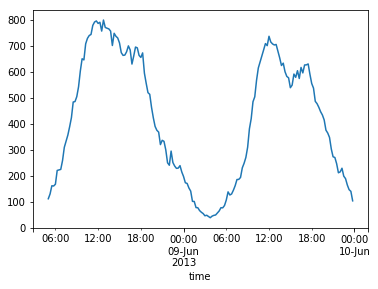

In [25]:
week_volume[500:].plot()

In [5]:
# x = np.arange(0,week_volume.shape[0])%96
# y = np.array([])
# for i in range(7):
#     tmp = np.ones(96)*i
#     y = np.hstack((y,tmp))
    
# z = week_volume.values
z = week_volume.values

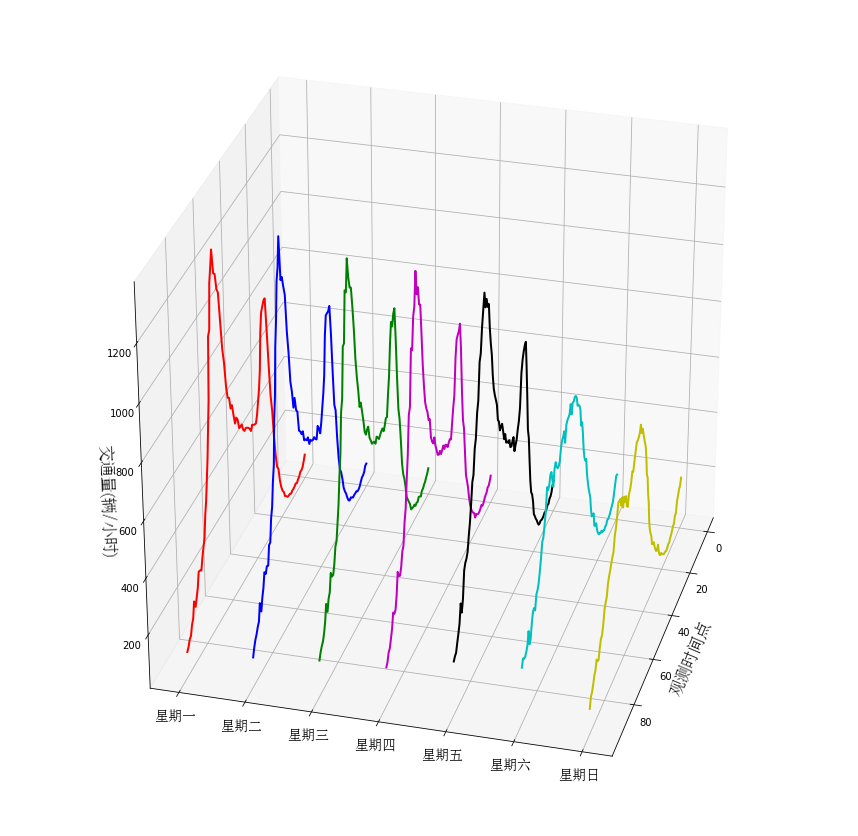

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as mp
# del mpl.font_manager.weight_dict['roman']
# mpl.font_manager._rebuild()

from matplotlib.font_manager import FontProperties
c_font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
fontsz = 16
font = {'family': 'STSong',
        'weight': 'normal',
        'size': 16
        }

fig = plt.figure(figsize =(15,10))
ax = fig.gca(projection='3d')

colors = ['r', 'b', 'g', 'm', 'k', 'c', 'y']
yticks = np.arange(0, 7) #np.arange(6, -1,-1)
for c, k in zip(colors, yticks):
    x = np.arange(0, 96)
    y = np.ones(96)*k
    z = week_volume.values[k*96: (k+1)*96]
    ax.plot(x, y, z, c, linewidth=2)

ax.view_init(elev=30,azim=375)#改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.set_xlabel('观测时间点', fontdict=font)
ax.set_ylabel('', fontdict=font, va='baseline')
ax.set_zlabel('交通量(辆/小时)', fontdict=font)
qwe = range(0,7)
plt.yticks(qwe, ('星期一', '星期二', '星期三', '星期四', '星期五', '星期六', '星期日'), fontproperties=c_font, size=14)
# plt.savefig("./pic/毕设/时间相关性一周3d图.png", dpi=300)
plt.show()

In [26]:
monday_volume = np.array([])
start_monday = 0

for i in range(4):
    monday_volume = np.hstack((monday_volume, matrix_df[observe_pnt][start_monday*96: (start_monday+1)*96].values))
    start_monday = start_monday+7
    
monday_volume.shape

(384,)

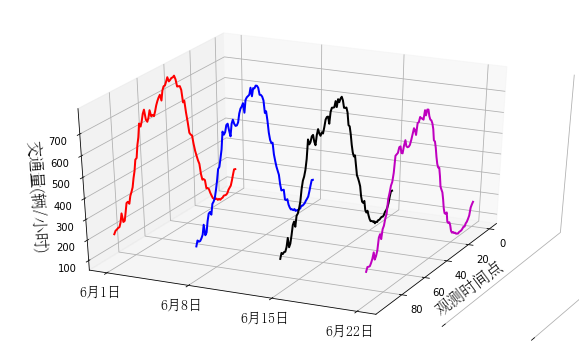

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as mp
# del mpl.font_manager.weight_dict['roman']
# mpl.font_manager._rebuild()

from matplotlib.font_manager import FontProperties
c_font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
fontsz = 16
font = {'family': 'STSong',
        'weight': 'normal',
        'size': 16
        }

fig = plt.figure(figsize =(10,6))
ax = fig.gca(projection='3d')

colors = ['r', 'b', 'k', 'm']
yticks = np.arange(0, 4) #np.arange(6, -1,-1)
for c, k in zip(colors, yticks):
    x = np.arange(0, 96)
    y = np.ones(96)*k
    z = monday_volume[k*96: (k+1)*96]
    ax.plot(x, y, z, c, linewidth=2)

ax.view_init(elev=30,azim=25)#改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.set_xlabel('观测时间点', fontdict=font)
# ax.set_ylabel('', fontdict=font, va='baseline')
ax.set_zlabel('交通量(辆/小时)', fontdict=font)
qwe = range(0,7)
# plt.yticks(qwe, ('6月3日', '6月10日', '6月17日', '6月24日'), fontproperties=c_font, size=14) #周一
plt.yticks(qwe, ('6月1日', '6月8日', '6月15日', '6月22日'), fontproperties=c_font, size=14) #周一
# plt.savefig("./pic/毕设/时间相关性每周六3d图.png", dpi=300)
plt.show()

In [127]:
np.arange(6,0,-1)

array([7, 6, 5, 4, 3, 2, 1])

In [38]:
# idx = trafficV[trafficV['Time'] == '2013-01-31 03:30:00'].index
# matrix_pic = trafficV.loc[idx].sort_values(['yCoordinate', 'xCoordinate'])
# matrix_test = np.zeros(matrix_len*matrix_len)
# matrix_test = matrix_pic['Flow']
# matrix_test.reshape((matrix_len, matrix_len))

In [40]:
# matrix_df = pd.read_csv('./data/trafficV201301_M.csv', index_col=0, parse_dates=True)
# temp_df = pd.read_csv('./data/trafficV201302_M.csv', index_col=0, parse_dates=True)
# matrix_df = pd.concat([matrix_df, temp_df], axis=0)
# temp_df = pd.read_csv('./data/trafficV201303_M.csv', index_col=0, parse_dates=True)
# matrix_df = pd.concat([matrix_df, temp_df], axis=0)
# temp_df = pd.read_csv('./data/trafficV201304_M.csv', index_col=0, parse_dates=True)
# matrix_df = pd.concat([matrix_df, temp_df], axis=0)
# temp_df = pd.read_csv('./data/trafficV201305_M.csv', index_col=0, parse_dates=True)
# matrix_df = pd.concat([matrix_df, temp_df], axis=0)
# temp_df = pd.read_csv('./data/trafficV201306_M.csv', index_col=0, parse_dates=True)
# matrix_df = pd.concat([matrix_df, temp_df], axis=0)

# matrix_df.to_csv('./data/trafficV_M.csv')